In [1]:
import sklearn.metrics
from sklearn import datasets
import numpy as np

wine_dataset = datasets.load_wine()

In [2]:
X = wine_dataset.data
y = wine_dataset.target


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=2, test_size=0.25)
X_train.shape

(99, 13)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
n_neighbors = 5
model = KNeighborsClassifier(n_neighbors)

In [8]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
pred_val = model.predict(X_val)

In [10]:
accuracy = np.mean(pred_val == y_val)
print(f'Accuracy on validation is {accuracy}')

Accuracy on validation is 0.7647058823529411


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, pred_val)

In [13]:
cm

array([[10,  1,  3],
       [ 0, 10,  2],
       [ 0,  2,  6]])

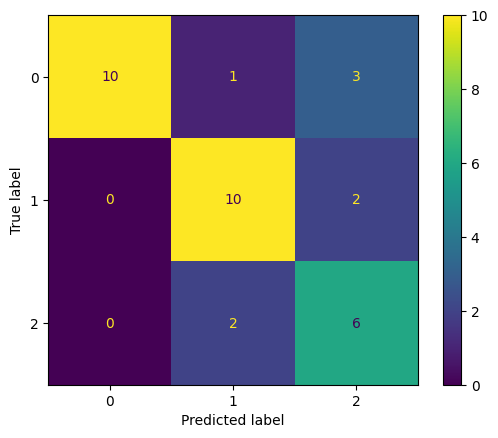

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

In [16]:
import sklearn
accuracy = sklearn.metrics.accuracy_score(y_val, pred_val)
recall = sklearn.metrics.recall_score(y_val, pred_val, average = 'macro')
precision = sklearn.metrics.precision_score(y_val, pred_val, average = 'macro')

print(f'accuracy: {accuracy}')
print(f'recall: {recall}')
print(f'precision: {precision}')

accuracy: 0.7647058823529411
recall: 0.7658730158730158
precision: 0.7715617715617715


In [17]:
best_k = 1
best_accuracy = -1
for k in range(1,40):
    model = KNeighborsClassifier(k)
    model.fit(X_train,y_train)
    pred_val = model.predict(X_val)
    accuracy = np.mean(pred_val == y_val)
    print(f'Accuracy on validation with k = {k} is {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(best_k, best_accuracy)

Accuracy on validation with k = 1 is 0.7352941176470589
Accuracy on validation with k = 2 is 0.6764705882352942
Accuracy on validation with k = 3 is 0.7352941176470589
Accuracy on validation with k = 4 is 0.7352941176470589
Accuracy on validation with k = 5 is 0.7647058823529411
Accuracy on validation with k = 6 is 0.7647058823529411
Accuracy on validation with k = 7 is 0.7352941176470589
Accuracy on validation with k = 8 is 0.8235294117647058
Accuracy on validation with k = 9 is 0.8235294117647058
Accuracy on validation with k = 10 is 0.7058823529411765
Accuracy on validation with k = 11 is 0.7647058823529411
Accuracy on validation with k = 12 is 0.7941176470588235
Accuracy on validation with k = 13 is 0.7352941176470589
Accuracy on validation with k = 14 is 0.7941176470588235
Accuracy on validation with k = 15 is 0.7647058823529411
Accuracy on validation with k = 16 is 0.7352941176470589
Accuracy on validation with k = 17 is 0.7352941176470589
Accuracy on validation with k = 18 is 0.

In [21]:
k = 8
model = KNeighborsClassifier(k)
model.fit(X_train,y_train)
pred_val = model.predict(X_val)
accuracy = np.mean(pred_val == y_val)
print(f'Accuracy on validation with k = {k} is {accuracy}')
cm = confusion_matrix(y_val, pred_val)
cm

Accuracy on validation with k = 8 is 0.8235294117647058


array([[12,  1,  1],
       [ 1, 10,  1],
       [ 0,  2,  6]])

In [23]:
cm.sum(axis=1)


array([14, 12,  8])

In [24]:
cm[np.eye(3).astype('bool')]

array([12, 10,  6])